In [ ]:
# Making necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Loading Data
data = pd.read_excel("C:/Users/srian/Documents/GitHub/Generative-AI-project/Centrifugal_pumps_measurements.xlsx")

data

,Machine_ID,value_ISO,value_DEMO,value_ACC,value_P2P,valueTEMP,minute,second,year,month,day,hour,Pump_Status
0,1,0.349609,0.000343,0.012512,0.042480,24.25,33,41,2022,12,7,12,Healthy
1,1,0.349609,0.000343,0.012512,0.042480,24.25,33,46,2022,12,7,12,Healthy
2,1,0.349609,0.000343,0.012512,0.042480,24.25,33,51,2022,12,7,12,Healthy
3,1,0.349609,0.000343,0.012512,0.042480,24.25,33,56,2022,12,7,12,Healthy
4,1,0.349609,0.000343,0.012512,0.042480,24.25,34,1,2022,12,7,12,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,2,0.023193,0.000277,0.000637,0.006409,23.00,11,47,2022,12,14,15,Not Healthy
5110,2,0.023193,0.000277,0.000637,0.006409,23.00,11,52,2022,12,14,15,Not Healthy
5111,2,0.023193,0.000277,0.000637,0.006409,23.00,11,57,2022,12,14,15,Not Healthy
5112,2,0.023193,0.000277,0.000637,0.006409,23.00,12,2,2022,12,14,15,Not Healthy


In [2]:
# Checking for missing values
data.isnull().sum()

Machine_ID     0
value_ISO      0
value_DEMO     0
value_ACC      0
value_P2P      0
valueTEMP      0
minute         0
second         0
year           0
month          0
day            0
hour           0
Pump_Status    0
dtype: int64

In [3]:
# Encoding categorical variable
label_encoder = LabelEncoder()
data['Pump_Status'] = label_encoder.fit_transform(data['Pump_Status'])

data

,Machine_ID,value_ISO,value_DEMO,value_ACC,value_P2P,valueTEMP,minute,second,year,month,day,hour,Pump_Status
0,1,0.349609,0.000343,0.012512,0.042480,24.25,33,41,2022,12,7,12,0
1,1,0.349609,0.000343,0.012512,0.042480,24.25,33,46,2022,12,7,12,0
2,1,0.349609,0.000343,0.012512,0.042480,24.25,33,51,2022,12,7,12,0
3,1,0.349609,0.000343,0.012512,0.042480,24.25,33,56,2022,12,7,12,0
4,1,0.349609,0.000343,0.012512,0.042480,24.25,34,1,2022,12,7,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,2,0.023193,0.000277,0.000637,0.006409,23.00,11,47,2022,12,14,15,1
5110,2,0.023193,0.000277,0.000637,0.006409,23.00,11,52,2022,12,14,15,1
5111,2,0.023193,0.000277,0.000637,0.006409,23.00,11,57,2022,12,14,15,1
5112,2,0.023193,0.000277,0.000637,0.006409,23.00,12,2,2022,12,14,15,1


In [4]:
# Droping non-feature columns
X = data.drop(['Pump_Status', 'minute', 'second', 'year', 'month', 'day', 'hour'], axis=1)
y = data['Pump_Status']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[773   0]
 [  0 762]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1535
   macro avg       1.00      1.00      1.00      1535
weighted avg       1.00      1.00      1.00      1535


Accuracy Score:
1.0


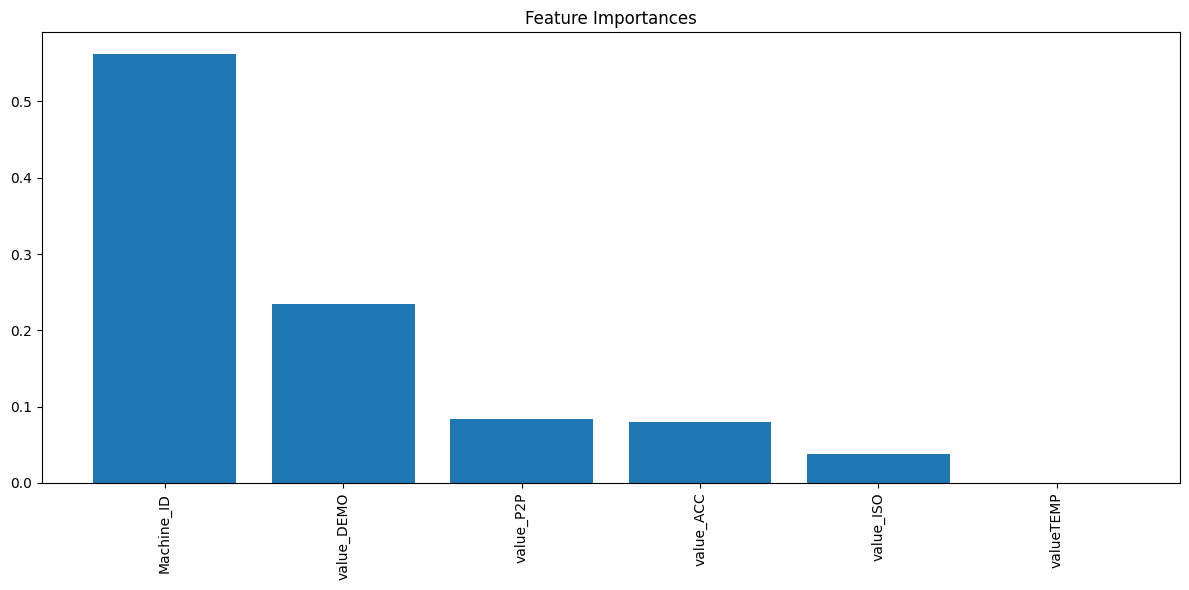

In [6]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [7]:
# --------------------------------------------------------------

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Loading Data
data = pd.read_excel("C:/Users/srian/Documents/GitHub/Generative-AI-project/Centrifugal_pumps_measurements.xlsx")

data

,Machine_ID,value_ISO,value_DEMO,value_ACC,value_P2P,valueTEMP,minute,second,year,month,day,hour,Pump_Status
0,1,0.349609,0.000343,0.012512,0.042480,24.25,33,41,2022,12,7,12,Healthy
1,1,0.349609,0.000343,0.012512,0.042480,24.25,33,46,2022,12,7,12,Healthy
2,1,0.349609,0.000343,0.012512,0.042480,24.25,33,51,2022,12,7,12,Healthy
3,1,0.349609,0.000343,0.012512,0.042480,24.25,33,56,2022,12,7,12,Healthy
4,1,0.349609,0.000343,0.012512,0.042480,24.25,34,1,2022,12,7,12,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,2,0.023193,0.000277,0.000637,0.006409,23.00,11,47,2022,12,14,15,Not Healthy
5110,2,0.023193,0.000277,0.000637,0.006409,23.00,11,52,2022,12,14,15,Not Healthy
5111,2,0.023193,0.000277,0.000637,0.006409,23.00,11,57,2022,12,14,15,Not Healthy
5112,2,0.023193,0.000277,0.000637,0.006409,23.00,12,2,2022,12,14,15,Not Healthy


In [9]:
# Encode categorical variable
label_encoder = LabelEncoder()
data['Pump_Status'] = label_encoder.fit_transform(data['Pump_Status'])

# Drop non-feature columns
X = data.drop(['Pump_Status', 'minute', 'second', 'year', 'month', 'day', 'hour'], axis=1)
y = data['Pump_Status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten

# Generator model
def build_generator(latent_dim, n_features):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(n_features, activation='tanh'))
    return model

# Discriminator model
def build_discriminator(n_features):
    model = Sequential()
    model.add(Dense(256, input_dim=n_features))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [11]:
latent_dim = 100
n_features = X_train.shape[1]

# Build and compile the discriminator
discriminator = build_discriminator(n_features)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build the generator
generator = build_generator(latent_dim, n_features)

# Build and compile the GAN
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')


c:\Users\srian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\srian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Clear any previous session
tf.keras.backend.clear_session()

# Function to generate and plot synthetic data
def plot_generated_data(epoch, generator, latent_dim, n_samples=100):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    generated_data = generator.predict(noise)
    plt.figure(figsize=(12, 6))
    plt.scatter(generated_data[:, 0], generated_data[:, 1], color='red')
    plt.title(f'Synthetic Data at Epoch {epoch}')
    plt.show()


# Training the GAN
epochs = 10000
batch_size = 64
half_batch = int(batch_size / 2)

for epoch in range(epochs):
    # Train Discriminator on real and fake data
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_data = X_train[idx]
    
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    generated_data = generator.predict(noise)
    
    # Train on real data
    d_loss_real = discriminator.train_on_batch(real_data, np.ones((half_batch, 1)))
    # Train on generated (fake) data
    d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.array([1] * batch_size)
    g_loss = gan.train_on_batch(noise, valid_y)
    
    # Print the progress
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")
        plot_generated_data(epoch, generator, latent_dim)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


AttributeError: 'NoneType' object has no attribute 'update_state'

In [ ]:
# Training the GAN
epochs = 10000
batch_size = 64

half_batch = int(batch_size / 2)

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_data = X_train[idx]
    
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    generated_data = generator.predict(noise)
    
    d_loss_real = discriminator.train_on_batch(real_data, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.array([1] * batch_size)
    g_loss = gan.train_on_batch(noise, valid_y)
    
    # Print the progress
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")
        plot_generated_data(epoch, generator, latent_dim)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


AttributeError: 'NoneType' object has no attribute 'update_state'

In [ ]:
# Generate synthetic data
noise = np.random.normal(0, 1, (X_test.shape[0], latent_dim))
synthetic_data = generator.predict(noise)

# Compare synthetic data with real test data
# This comparison can be done using various anomaly detection techniques
# Here we simply plot for visualization
plt.figure(figsize=(12, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], color='blue', label='Real Data')
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], color='red', label='Synthetic Data')
plt.legend()
plt.title('Real vs Synthetic Data')
plt.show()
